In [1]:
# imports
from pathlib import Path
from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from utils import (
    read_single_problem_from_path_as_adjacency,
    read_single_problem_from_path_as_sparse,
    read_single_problem_from_path_as_sparse_from_adjacency,
    order_nodes_in_descending_order,
    check_validity_for_adjacency,
    transform_node_clique_to_zero_one,
    transform_zero_one_clique_to_nodes
)
from constants import BASE_INSTANCES_FILES, OTHER_INSTANCES_FILES, OTHER_INSTANCES_BEST_KNOWN, BASE_INSTANCES_BEST_KNOWN
from heuristics import (
    HeuristicRunner,
    descending_degree_glutonous_heuristic,
    dynamic_descending_degree_glutonous_heuristic,
    descending_degree_random_heuristic,
    multiple_descending_degree_random_heuristic
)

# Constants
ROOT_DIR = Path.cwd().parent
# Instances pathes
INSTANCES_DIR = ROOT_DIR / "instances"
BASE_INSTANCES_DIR = INSTANCES_DIR / "project_instances"
OTHER_INSTANCES_DIR = INSTANCES_DIR / "other_instances"


In [2]:
_, _, graph, degrees = read_single_problem_from_path_as_adjacency(
    instance_path=BASE_INSTANCES_DIR / "random-10.col"
)
print(graph)
clique = descending_degree_glutonous_heuristic(graph=graph, degrees=degrees)
print(clique)
print("Is the clique valid ? ", check_validity_for_adjacency(graph, clique))


[[0 1 0 1 1 1 0 0 1 0]
 [1 0 1 0 1 0 1 1 1 1]
 [0 1 0 1 0 1 0 0 0 1]
 [1 0 1 0 0 0 0 0 1 0]
 [1 1 0 0 0 1 1 1 0 1]
 [1 0 1 0 1 0 1 0 1 0]
 [0 1 0 0 1 1 0 1 1 1]
 [0 1 0 0 1 0 1 0 0 1]
 [1 1 0 1 0 1 1 0 0 0]
 [0 1 1 0 1 0 1 1 0 0]]
[0 1 0 0 1 0 1 1 0 1]
Is the clique valid ?  True


In [3]:
# Check that clique representation utils work
number_of_nodes, _, graph, degrees = read_single_problem_from_path_as_adjacency(
    instance_path=BASE_INSTANCES_DIR / "random-10.col"
)
clique = descending_degree_glutonous_heuristic(graph=graph, degrees=degrees)
print(clique)
print(transform_zero_one_clique_to_nodes(clique))
print(transform_node_clique_to_zero_one(number_of_nodes, transform_zero_one_clique_to_nodes(clique)))

[0 1 0 0 1 0 1 1 0 1]
[1, 4, 6, 7, 9]
[0 1 0 0 1 0 1 1 0 1]


In [2]:
# Test on project instances
runner = HeuristicRunner(
    instances_dir=BASE_INSTANCES_DIR,
    instances=BASE_INSTANCES_FILES,
    methods=[
        (descending_degree_glutonous_heuristic, "desc_base"),
        (dynamic_descending_degree_glutonous_heuristic, "desc_dyn"),
        (descending_degree_random_heuristic, "desc_ran"),
        (multiple_descending_degree_random_heuristic, "mult_ran")
    ],
    known_bests=BASE_INSTANCES_BEST_KNOWN,
    display_time_details=False
)
runner.run_all_methods_on_all_instances()
runner.display_results()
runner.display_dataframe.to_csv("heuristics_results_base_instances.csv", sep=";")

          instance     method  clique  best  total(s)
0   brock200_2.col  desc_base       7    12  0.031023
1   brock200_2.col   desc_dyn       7    12  0.045048
2   brock200_2.col   desc_ran       8    12  0.063035
3   brock200_2.col   mult_ran       7    12  0.074534
4    dsjc125.1.col  desc_base       4     4  0.007683
5    dsjc125.1.col   desc_dyn       4     4  0.003998
6    dsjc125.1.col   desc_ran       4     4  0.004040
7    dsjc125.1.col   mult_ran       4     4  0.024357
8    random-10.col  desc_base       5     5  0.001002
9    random-10.col   desc_dyn       5     5  0.001043
10   random-10.col   desc_ran       3     5  0.001332
11   random-10.col   mult_ran       3     5  0.001978
12  random-100.col  desc_base       8     9  0.008779
13  random-100.col   desc_dyn       8     9  0.009966
14  random-100.col   desc_ran       7     9  0.012613
15  random-100.col   mult_ran       7     9  0.028718
16   random-40.col  desc_base       7     7  0.001999
17   random-40.col   desc_dy

In [5]:
# Test on other bigger instances.
runner = HeuristicRunner(
    instances_dir=OTHER_INSTANCES_DIR,
    instances=OTHER_INSTANCES_FILES,
    methods=[
        (descending_degree_glutonous_heuristic, "desc_base"),
        (dynamic_descending_degree_glutonous_heuristic, "desc_dyn"),
        (descending_degree_random_heuristic, "desc_ran"),
        (multiple_descending_degree_random_heuristic, "mult_ran")
    ],
    known_bests=OTHER_INSTANCES_BEST_KNOWN,
    display_time_details=False
)
runner.run_all_methods_on_all_instances()
runner.display_results()

              instance     method clique best  total(s)
0       brock800_4.txt  desc_base     14   26  0.605979
1       brock800_4.txt   desc_dyn     14   26  0.736306
2       brock800_4.txt   desc_ran     15   26  0.609477
3       brock800_4.txt   mult_ran     14   26  0.859375
4                  ///        ///    ///  ///       ///
5          C2000.5.txt  desc_base     10   16  2.756715
6          C2000.5.txt   desc_dyn     10   16  2.762853
7          C2000.5.txt   desc_ran     11   16  2.741397
8          C2000.5.txt   mult_ran     11   16  3.207902
9                  ///        ///    ///  ///       ///
10          C500.9.txt  desc_base     43   57  0.334108
11          C500.9.txt   desc_dyn     42   57  0.343571
12          C500.9.txt   desc_ran     42   57  0.330331
13          C500.9.txt   mult_ran     42   57  0.670631
14                 ///        ///    ///  ///       ///
15  gen400_p0.9_75.txt  desc_base     47   75  0.309144
16  gen400_p0.9_75.txt   desc_dyn     47   75  0

In [6]:
# Test different size of choices for the nodes for random heuristic
methods = [
    (lambda *args, **kwargs: descending_degree_random_heuristic(*args, **kwargs, size_of_choice=2), f"ran_{2}"),
    (lambda *args, **kwargs: descending_degree_random_heuristic(*args, **kwargs, size_of_choice=3), f"ran_{3}"),
    (lambda *args, **kwargs: descending_degree_random_heuristic(*args, **kwargs, size_of_choice=4), f"ran_{4}"),
    (lambda *args, **kwargs: descending_degree_random_heuristic(*args, **kwargs, size_of_choice=5), f"ran_{5}"),
    (lambda *args, **kwargs: descending_degree_random_heuristic(*args, **kwargs, size_of_choice=6), f"ran_{6}"),
    (lambda *args, **kwargs: descending_degree_random_heuristic(*args, **kwargs, size_of_choice=7), f"ran_{7}"),
    (lambda *args, **kwargs: descending_degree_random_heuristic(*args, **kwargs, size_of_choice=8), f"ran_{8}"),
    (lambda *args, **kwargs: descending_degree_random_heuristic(*args, **kwargs, size_of_choice=9), f"ran_{9}"),
    (lambda *args, **kwargs: descending_degree_random_heuristic(*args, **kwargs, size_of_choice=10), f"ran_{10}"),
    (lambda *args, **kwargs: descending_degree_random_heuristic(*args, **kwargs, size_of_choice=11), f"ran_{11}"),
    (lambda *args, **kwargs: descending_degree_random_heuristic(*args, **kwargs, size_of_choice=12), f"ran_{12}"),
    (lambda *args, **kwargs: descending_degree_random_heuristic(*args, **kwargs, size_of_choice=13), f"ran_{13}"),
    (lambda *args, **kwargs: descending_degree_random_heuristic(*args, **kwargs, size_of_choice=14), f"ran_{14}"),
    (lambda *args, **kwargs: descending_degree_random_heuristic(*args, **kwargs, size_of_choice=15), f"ran_{15}"),
]
runner = HeuristicRunner(
    instances_dir=BASE_INSTANCES_DIR,
    instances=BASE_INSTANCES_FILES,
    methods=methods,
    known_bests={},
    display_time_details=False
)
runner.run_all_methods_on_all_instances()
runner.display_results()

          instance  method clique best  total(s)
0   brock200_2.col   ran_2      7   //  0.034874
1   brock200_2.col   ran_3      7   //  0.031943
2   brock200_2.col   ran_4      8   //   0.03089
3   brock200_2.col   ran_5      8   //  0.031914
4   brock200_2.col   ran_6      7   //   0.03089
..             ...     ...    ...  ...       ...
85   random-70.col  ran_12      6   //  0.006013
86   random-70.col  ran_13      5   //  0.005983
87   random-70.col  ran_14      8   //  0.005956
88   random-70.col  ran_15      6   //  0.004986
89             ///     ///    ///  ///       ///

[90 rows x 5 columns]


In [15]:
# Testing size_of_choice parameter
"""
instance = "gen400_p0.9_75.txt"
number_of_nodes, _, graph, degrees = read_single_problem_from_path_as_adjacency(
    instance_path=OTHER_INSTANCES_DIR / instance
)
choices_sizes = np.arange(2,  number_of_nodes //2)
best_cliques = np.zeros(len(choices_sizes))
mean_cliques =np.zeros(len(choices_sizes))
for i in range(len(choices_sizes)):
    size_of_choice = choices_sizes[i]
    clique_sizes = np.zeros(50)
    for j in range(50):
        clique = descending_degree_random_heuristic(graph=graph, degrees=degrees,size_of_choice=size_of_choice)
        clique_sizes[j]= np.sum(clique)

    best_cliques[i] = np.max(clique_sizes)
    mean_cliques[i] = np.mean(clique_sizes)
"""

[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199]


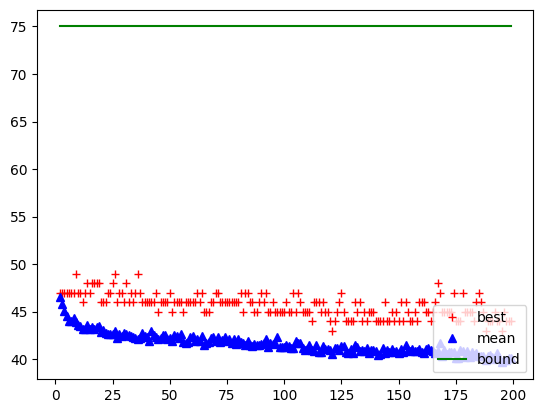

In [16]:
# Displaying random results for several sizes.
"""
plt.clf()

plt.plot(choices_sizes, best_cliques, "r+", label="best")
plt.plot(choices_sizes, mean_cliques, "b^", label="mean")
plt.plot(choices_sizes, OTHER_INSTANCES_BEST_KNOWN[instance] * np.ones(len(mean_cliques)), "g", label="bound")
plt.legend(loc="lower right")
plt.show()
"""